In [505]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%xmode plain

Exception reporting mode: Plain


# Import the data

In [506]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [507]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


Okay, so 1,460 rows of 80 independent variables.

<img src="http://i0.kym-cdn.com/photos/images/facebook/000/930/538/7cc.jpg" >

Let's take a look at the data dictionary. (I then looked at the data dictionary and wrote nothing about it because there are too many damn variables. According to [the guy that got this data together](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf), there are 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables here.)

Let's merge the test and train datasets for EDA.

In [508]:
test['SalePrice'] = np.nan
df = pd.concat([train, test], axis=0)
train_ids = train['Id']
test_ids = test['Id']

In [509]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [510]:
df.shape

(2919, 81)

# Clean the data

Below, I define a function that checks our dataframe for missing values and prints them in descending order of missings per variable. I'll use this below while cleaning and imputing the data to check my progress.

In [511]:
def check_missings():
    return df.apply(pd.isnull).sum().sort_values(ascending=False).loc[ lambda series: series>0 ]

In [512]:
df['PoolQC'] = df['PoolQC'].replace({np.nan: 'No pool'})

In [513]:
df['MiscFeature'] = df['MiscFeature'].replace({np.nan: 'No misc. features'})
df['Alley'] = df['Alley'].replace({np.nan: 'No alley'})
df['Fence'] = df['Fence'].replace({np.nan: 'No fence'})
df['FireplaceQu'] = df['FireplaceQu'].replace({np.nan: 'No fireplace'})
df['GarageFinish'] = df['GarageFinish'].replace({np.nan: 'No garage'})
df['GarageCond'] = df['GarageCond'].replace({np.nan: 'No garage'})
df['GarageQual'] = df['GarageQual'].replace({np.nan: 'No garage'})
df['GarageType'] = df['GarageType'].replace({np.nan: 'No garage'})
df['BsmtCond'] = df['BsmtCond'].replace({np.nan: 'No basement'})
df['BsmtExposure'] = df['BsmtExposure'].replace({np.nan: 'No basement'})
df['BsmtQual'] = df['BsmtQual'].replace({np.nan: 'No basement'})
df['BsmtFinType2'] = df['BsmtFinType2'].replace({np.nan: 'No basement'})
df['BsmtFinType1'] = df['BsmtFinType1'].replace({np.nan: 'No basement'})
df['MasVnrType'] = df['MasVnrType'].replace({np.nan: 'No masonry'})

In [514]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [515]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [516]:
df['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

My guess is that those missings for `LotFrontage` are actually zeros, since the minimum is 21ft:

In [517]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)

In [518]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [519]:
df['MSZoning'] = df['MSZoning'].fillna('RL')

In [520]:
df['Utilities'].describe()

count       2917
unique         2
top       AllPub
freq        2916
Name: Utilities, dtype: object

In [521]:
df['Utilities'] = df['Utilities'].fillna('AllPub')

In [522]:
df['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [523]:
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)

In [524]:
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)

In [525]:
df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [526]:
df['Functional'] = df['Functional'].fillna('Typ')

In [527]:
df['GarageArea'].describe()

count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [528]:
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].mean())

In [529]:
df['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [530]:
df['GarageCars'] = df['GarageCars'].fillna(2)

In [531]:
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())

In [532]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())

In [533]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [534]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [535]:
df['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [536]:
df['Exterior2nd'] = df['Exterior2nd'].fillna('VinylSd')

In [537]:
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [538]:
df['KitchenQual'] = df['KitchenQual'].fillna('TA')

In [539]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].value_counts().index[0])

In [540]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())

In [541]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())

In [542]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].value_counts().index[0])

We've taken care of all of our missings. True, some of the square-footage values may not make sense if the observations with missing values didn't have the object whose footage was being measured, but there are so few missings that it won't have any impact on our results.

# Explore the data

In [543]:
print('Data from years {} to {}.'.format(df['YrSold'].min(), df['YrSold'].max()))

Data from years 2006 to 2010.


Some questions:

* We'll need to incorporate `YrSold` for sure, since this period contains the Great Recession.
* Do prices fluctuate with the time of year?
* What interaction terms might we expect here?
* I bet `Neighborhood` will be a very important predictor.
* Would it be possible to augment this dataset with Census data, e.g., on race?
* I bet Iowa State University has a huge influence on housing prices.

# Some info about Ames, Iowa

* **Population**: 66,191 in 2016, in the top ten for the state of Iowa.
* **Density**: 2,436/$mi^2$
* **Major employers**: State/federal agencies
* Ranked in the top 15 *"Cities that have done the best since the recession"* by Bloomberg
* **Unemployment**: Ranked along with Boulder, CO as lowest unemployment rate in 2016.

Ames is a moderately-sized town smack-dab in the middle of Iowa, containing Iowa State University (ISU) and nestled between the state's major east-west and north-south highways. ISU employs almost 16,000 of the states 66,00 residents. The Iowa DoT is located in the city. Finally, Ames sees a lot of political activity by virtue of its being in Iowa. According to Wikipedia, the Ames Straw Poll was held in the city from 1979 through 2011 before being cancelled.

<iframe src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d47420.89231618093!2d-93.6613958149767!3d42.02589893729839!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x87ee70624634a06b%3A0x273156083cc75200!2sAmes%2C+IA!5e0!3m2!1sen!2sus!4v1507261616184" width="600" height="450" frameborder="0" style="border:0" allowfullscreen></iframe>

Looking at the map, a number of things jump out at me:

* Iowa State University is just west of the center of town; I bet this has a big impact on adjacent and nearby properties.
* There are a number of parks and golf courses. The two largest appear to be Coldwater Golf Links and the Ada Hayden Heritage Park.
* The airport is located at the very southern end of town.
* The town is framed on the south and east by the highways US-30 (a state route) and I-35 (a federal route).
* I bet Ames gets a lot of through-traffic due to the highways. Are there touristy neighborhoods or anything of that kind?
* US-69 runs north-south through the town, just west of I-35.
* The town's major streets more or less follow a grid pattern, while within each grid square there are residential streets.
* The South Skunk River runs north-south on the east side of town, while the Squaw River runs northwest-southeast, meeting up with the South Skunk in the southeast corner of town
* Can we feature-engineer postal code?
* A railroad runs east-west through town. According to Wikipedia, 60-70 trains run through Ames per day, sometimes leading to traffic delays. This would presumably decrease home values nearby.

I found a map of the neighborhoods:

<img src="neighborhoods.png" >

# EDA Plots

In [544]:
sns.set()
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

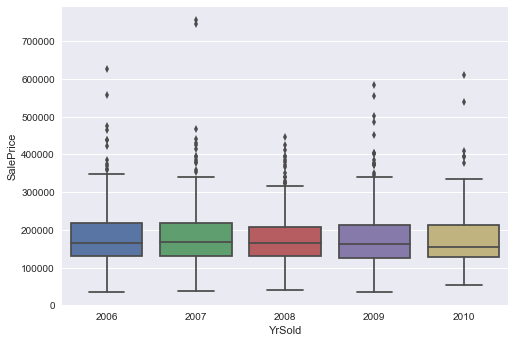

In [545]:
sns.boxplot(x=df['YrSold'], y=df['SalePrice'])

Strangely, Ames seems to have been immune from the Great Recession! This may actually be the case, given the city's being ranked by Bloomberg in the top 15 "cities that have done best since the recession".

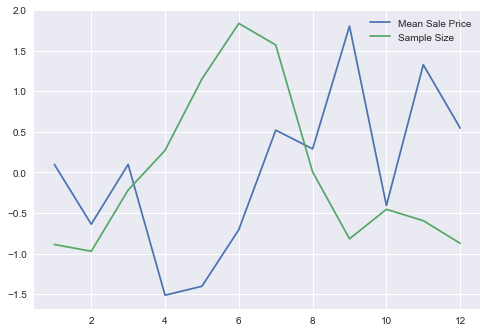

In [546]:
mean_sale_price = df.groupby('MoSold').mean()['SalePrice'].rename({'SalePrice': 'Mean Sale Price'})
n_by_month = df.groupby('MoSold').count()['SalePrice'].rename({'SalePrice': 'N'})


f, ax = plt.subplots()
ax.plot(mean_sale_price.index, (mean_sale_price - mean_sale_price.mean())/mean_sale_price.std(), label="Mean Sale Price")
ax.plot(mean_sale_price.index, (n_by_month - n_by_month.mean())/n_by_month.std(), label="Sample Size");
ax.legend();

In [547]:
from scipy.stats import pearsonr
print("Correlation:\t{}\nP-value:\t{}".format(*pearsonr(mean_sale_price, n_by_month)))

Correlation:	-0.41284640485757457
P-value:	0.1822619848263174


So it appears that our mean sale price is negatively correlated with the sample size over months, though not significantly so.

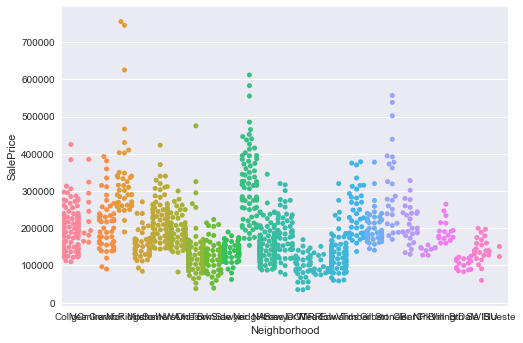

In [548]:
# sns.boxplot(x=df['Neighborhood'], y=df['SalePrice']);
# sns.stripplot(x=df['Neighborhood'], y=df['SalePrice']);
sns.swarmplot(x=df['Neighborhood'], y=df['SalePrice']);

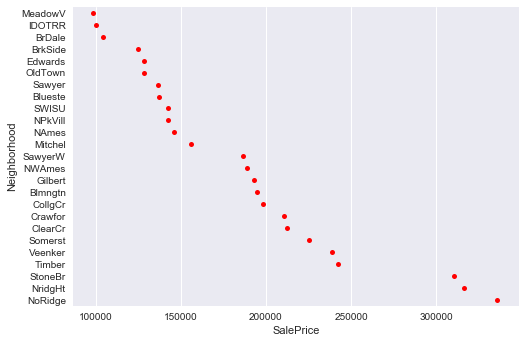

In [549]:
data = pd.concat(
    [
        df.groupby('Neighborhood').mean()['SalePrice'],
        df.groupby('Neighborhood').count()['Id']
    ], 
    
    axis=1)
f, ax = plt.subplots()
sns.stripplot(data.sort_values(by='SalePrice').SalePrice, data.sort_values(by='SalePrice').index, orient='h', color='red');
# sns.stripplot(data.sort_values(by='Id').Id, data.sort_values(by='Id').index, orient='h', color='red')

Interestingly, I see four clusters of neighborhoods above.

* Neighborhood 1: MeadowV:BrDale
* Neighborhood 2: BrkSide:Mitchel
* Neighborhood 3: SawyerW:Veenker
* Neighborhood 4: Timber:NoRidge

Let's aggregate this categorical variable:

In [550]:
hood_means = data.sort_values(by='SalePrice').SalePrice

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(hood_means.values.reshape(-1, 1))

In [551]:
kmeans.labels_

array([3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2])

In [552]:
hood_clusters = pd.concat(
    [
        hood_means, 
        pd.Series(kmeans.labels_, index=hood_means.index, name='Cluster')
    ],
    axis=1)

In [553]:
def neighborhood_to_cluster(neigh_string):
    return int(hood_clusters[ hood_clusters.index==neigh_string ]['Cluster'].values)
df['Neighborhood_cluster'] =  df['Neighborhood'].apply(neighborhood_to_cluster)

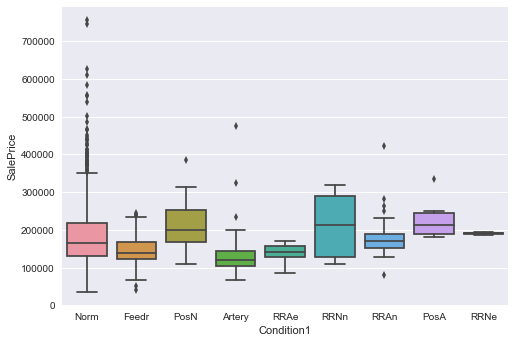

In [554]:
sns.boxplot(df['Condition1'], df['SalePrice'])

In [555]:
# sns.pairplot(df)

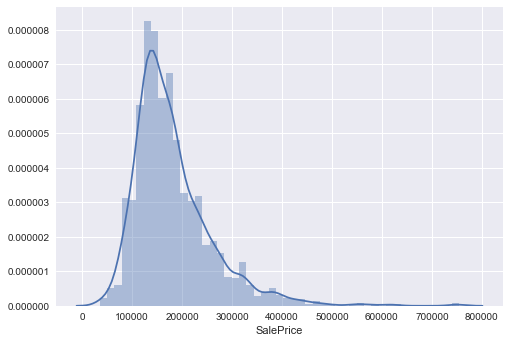

In [556]:
sns.distplot(df['SalePrice'][df['SalePrice'].notnull()]);

In [557]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

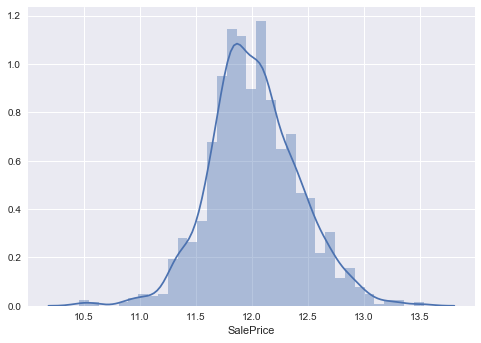

In [558]:
sns.distplot(df['SalePrice'][df['SalePrice'].notnull()].apply(np.log));

In [559]:
import scipy.stats
from scipy.stats.mstats import normaltest

print(normaltest(df['SalePrice'][df['SalePrice'].notnull()]))
print(normaltest(df['SalePrice'][df['SalePrice'].notnull()].apply(np.log)))

NormaltestResult(statistic=610.83591094726535, pvalue=2.2838483537877282e-133)
NormaltestResult(statistic=25.507009834238303, pvalue=2.8921658220523499e-06)


In [560]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

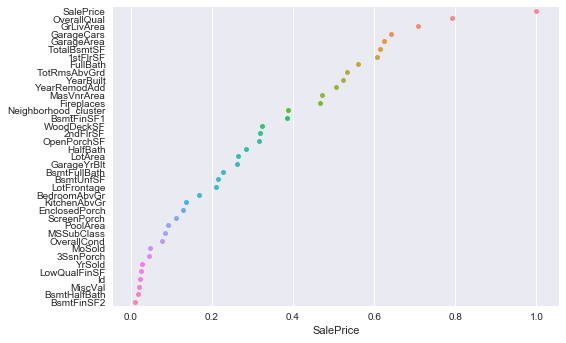

In [561]:
sorted_corrs = df.corr()['SalePrice'].apply(np.abs).sort_values(ascending=False)
sns.stripplot(sorted_corrs, sorted_corrs.index, orient='h');

In [562]:
def target_correlation(var):
    return pearsonr(df['SalePrice'][df['SalePrice'].notnull()], df[df['SalePrice'].notnull()][var])

result = list()
names = list()
for variable in pd.Series(df.columns):
    try:
        result.append(target_correlation(variable)[1])
        names.append(variable)
    except: pass
    
corr_significances = pd.DataFrame(pd.Series(result, index=names))

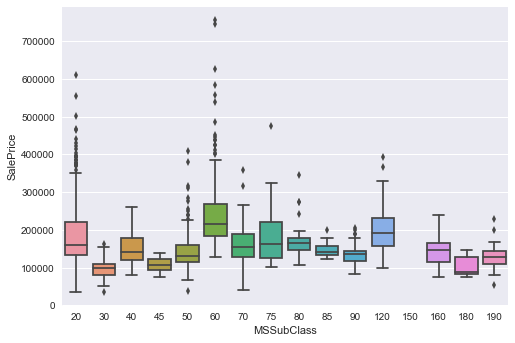

In [563]:
sns.boxplot(df['MSSubClass'], df['SalePrice'])

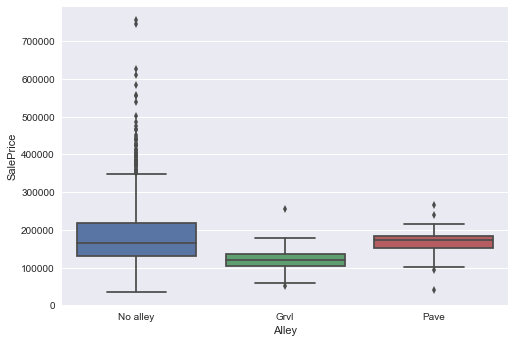

In [564]:
sns.boxplot(df['Alley'], df['SalePrice'])

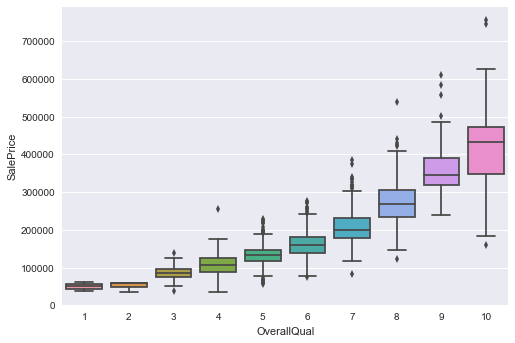

In [565]:
sns.boxplot(df['OverallQual'], df['SalePrice'])

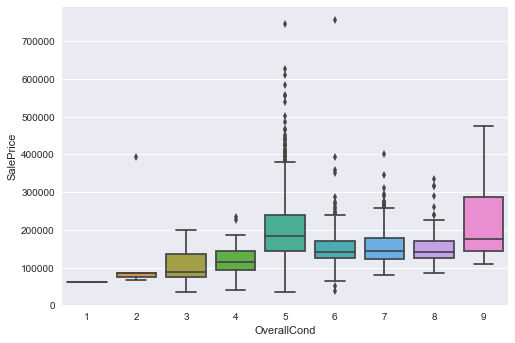

In [566]:
sns.boxplot(df['OverallCond'], df['SalePrice'])

In [567]:
# f, ax = plt.subplots()
# ax.plot(df['total_sq_feet'], df['SalePrice'], 'o');
# ax.set_yscale('log')

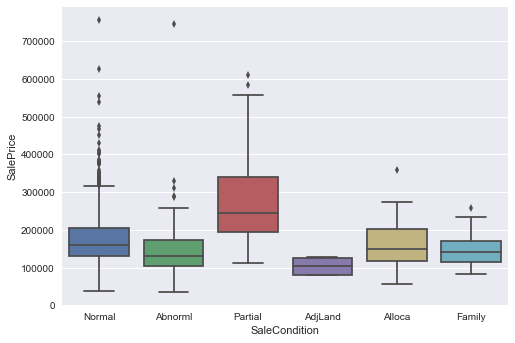

In [568]:
sns.boxplot(df['SaleCondition'], df['SalePrice'])

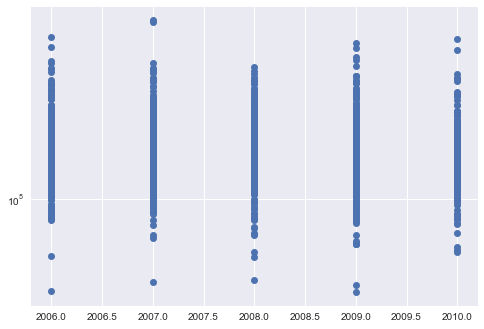

In [569]:
f, ax = plt.subplots()
ax.plot(df['YrSold'], df['SalePrice'], 'o');
ax.set_yscale('log')

In [570]:
df['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [571]:
total_area = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GarageArea'] + df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['PoolArea']
lot_usage_rate = df['LotArea'] / total_area
lot_usage_rate.describe()

count    2919.000000
mean        3.273355
std         2.054523
min         0.541216
25%         2.386355
50%         2.951807
75%         3.768997
max        45.943436
dtype: float64

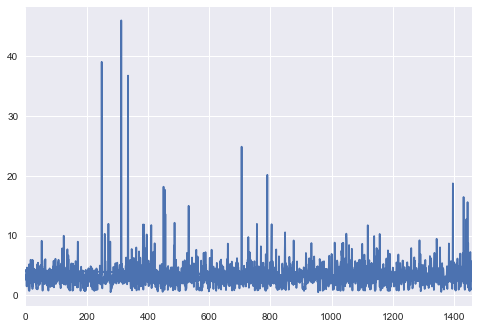

In [572]:
lot_usage_rate.plot()

In [573]:
df['lot_usage_rate'] = lot_usage_rate

In [574]:
pearsonr(df[ df['SalePrice'].notnull() ]['lot_usage_rate'], df[ df['SalePrice'].notnull() ]['SalePrice'])

(-0.039411466008102115, 0.13227138508495742)

In [575]:
# sns.plot(df['lot_usage_rate'])

In [576]:
df['total_sq_feet'] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]

In [577]:
# sns.pairplot(df[ df['SalePrice'].notnull() ].iloc[:, 0:20])

In [578]:
# sns.pairplot(df[ df['SalePrice'].notnull() ].iloc[:, 20:40])

In [579]:
# sns.pairplot(df[ df['SalePrice'].notnull() ].iloc[:, 40:60])

In [580]:
data = df[ df['SalePrice'].notnull() ].iloc[:, [80, *range(0, 10)]]
# sns.pairplot(data)

In [581]:
data = df[ df['SalePrice'].notnull() ].iloc[:, [80, *range(10, 30)]]
# sns.pairplot(data)

In [582]:
data = df[ df['SalePrice'].notnull() ].iloc[:, [80, *range(30, 40)]]
# sns.pairplot(data)

In [583]:
data = df[ df['SalePrice'].notnull() ].iloc[:, [80, *range(40, 50)]]
# sns.pairplot(data)

In [584]:
data = df[ df['SalePrice'].notnull() ].iloc[:, [80, *range(50, 60)]]
# sns.pairplot(data)

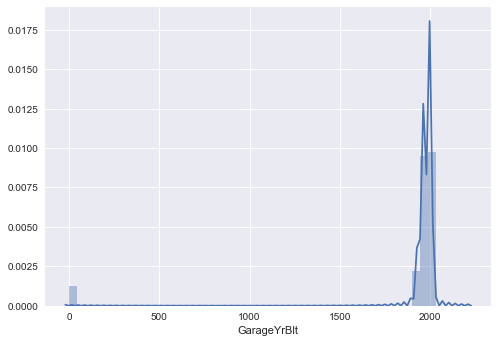

In [585]:
sns.distplot(df.GarageYrBlt)

In [586]:
df.GarageYrBlt.value_counts().head(5)

0.0       159
2005.0    142
2006.0    115
2007.0    115
2004.0     99
Name: GarageYrBlt, dtype: int64

Uh oh. We've discovered a problem with the data, perhaps from our imputation earlier.

In [587]:
df['GarageYrBlt'] = df['GarageYrBlt'].replace({0: df['GarageYrBlt'][df['GarageYrBlt'] != 0].mean()})

In [588]:
data = df[ df['SalePrice'].notnull() ].iloc[:, [80, *range(30, 40)]]
# sns.pairplot(data)

In [589]:
df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [590]:
df['YearRemodAdd'].describe()

count    2919.000000
mean     1984.264474
std        20.894344
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

# Feature Engineering

One thing I noticed with our continuous variables is that their distribution is usually bimodal, with a cluster around zero if the given attribute (e.g., a garage) is not present for that property. Let's binarize these variables.

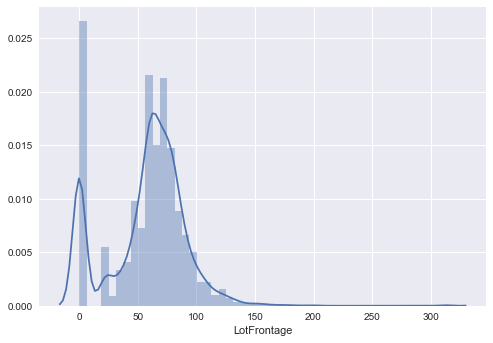

In [591]:
sns.distplot(df['LotFrontage'])

In [592]:
df['has_lot_frontage'] = df['LotFrontage'] > 0

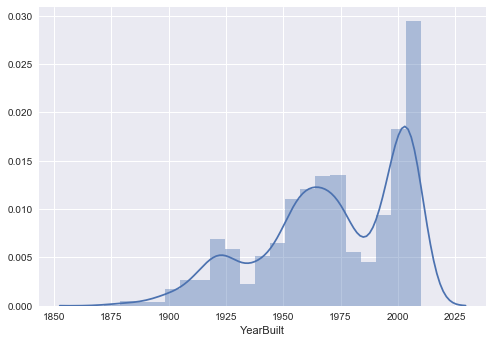

In [593]:
sns.distplot(df['YearBuilt'])

In [594]:
yrly_const_vol = df['YearBuilt'].value_counts().sort_index()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df['YearBuilt'].value_counts().values.reshape(-1, 1))

yrly_const_vol = pd.concat([pd.DataFrame(yrly_const_vol), pd.DataFrame(kmeans.labels_, index=yrly_const_vol.index)], axis=1)

In [595]:
yrly_const_vol['Year'] = yrly_const_vol.index
yrly_const_vol.groupby(0).describe()

Year                                                                    \
  count         mean        std     min      25%     50%      75%     max   
0                                                                           
0  67.0  1976.970149  19.537819  1942.0  1960.50  1977.0  1993.50  2010.0   
1  46.0  1916.630435  15.204325  1885.0  1905.25  1917.5  1928.75  1941.0   
2   5.0  1877.600000   4.037326  1872.0  1875.00  1879.0  1880.00  1882.0   

  YearBuilt                                                      
      count       mean        std  min   25%   50%   75%    max  
0                                                                
0      67.0  35.507463  27.130645  3.0  18.5  34.0  41.5  142.0  
1      46.0  11.543478  12.477013  1.0   2.0   8.0  16.0   57.0  
2       5.0   1.800000   1.788854  1.0   1.0   1.0   1.0    5.0

In [596]:
year_cluster = pd.Series(kmeans.labels_).reindex(range(len(df['YearBuilt'])))
years = df['YearBuilt']

In [597]:
year_cluster = pd.DataFrame({'year': years, 'cluster': year_cluster}, index=years.index)

In [598]:
year_cluster.groupby('year').mean()

,cluster
year,
1872,NaN
1875,NaN
1879,NaN
1880,NaN
1882,NaN
1885,0.000000
1890,0.000000
1892,NaN
1893,NaN


Okay, well k-means failed to identify clusters for yearly construction volume. But I maintain that there are three clear "construction periods" in Ames.

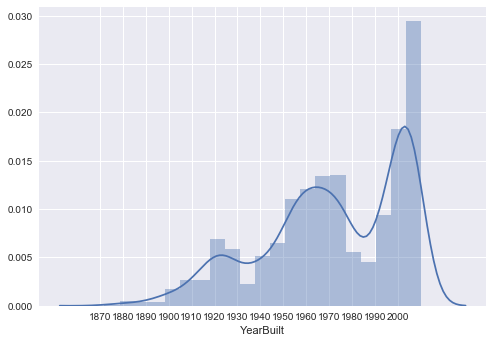

In [599]:
year_ticks = np.arange(1870, 2010, 10)
sns.distplot(df['YearBuilt']).axes.set_xticks(year_ticks);

Based on the above, I would identify the following construction periods:

* 1872-1935: Early construction and 1920's boom
* 1935-1985: Post-war construction boom
* 1985-2010: Extended growth leading up to the Great Recession

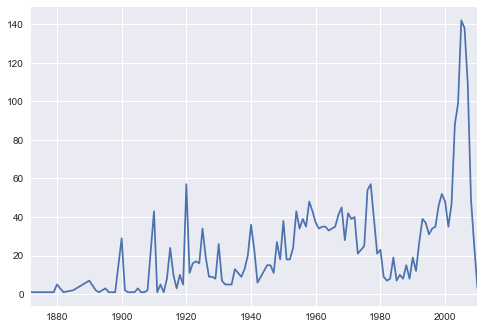

In [600]:
df['YearBuilt'].value_counts().sort_index().plot();

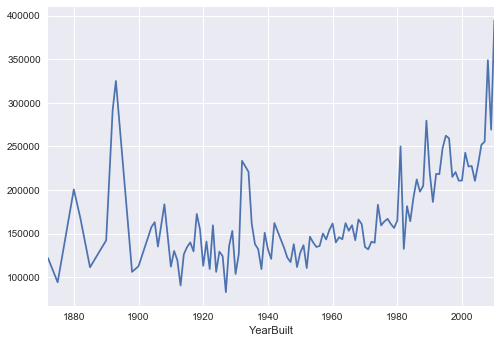

In [601]:
data = df[ df['SalePrice'].notnull() ].groupby('YearBuilt').mean()['SalePrice']
data.plot()

Okay, well in any case let's add the year clusters:

In [602]:
tmp = pd.Series(np.zeros(df.shape[0]), index=df.index)
tmp[ (df['YearBuilt'] > 1870) & (df['YearBuilt'] <= 1940) ] = 'Wave 1'
tmp[ (df['YearBuilt'] > 1940) & (df['YearBuilt'] <= 1985) ] = 'Wave 2'
tmp[ (df['YearBuilt'] > 1985) & (df['YearBuilt'] <= 2011) ] = 'Wave 3'
df['construction_cluster'] = tmp

In [603]:
df['has_garage'] = df['GarageArea'] > 0

In [604]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [605]:
df['has_woodDeck'] = df['WoodDeckSF'] > 0
df['has_openPorch'] = df['OpenPorchSF'] > 0
df['has_enclosedPorch'] = df['EnclosedPorch'] > 0
df['has_3ssnPorch'] = df['3SsnPorch'] > 0
df['has_screenPorch'] = df['ScreenPorch'] > 0
df['has_pool'] = df['PoolArea'] > 0
df['has_basement'] = df['TotalBsmtSF'] > 0

In [606]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

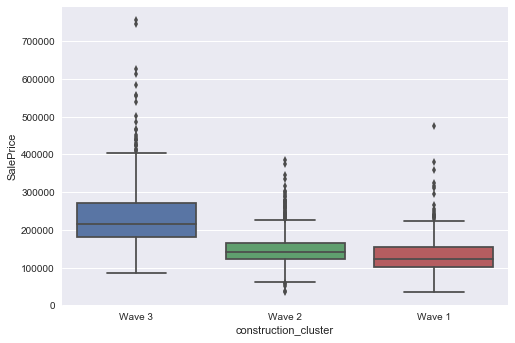

In [607]:
sns.boxplot(x=df['construction_cluster'], y=df['SalePrice'])

# Column Types

In [608]:
df.dtypes

Id                        int64
MSSubClass                int64
MSZoning                 object
LotFrontage             float64
LotArea                   int64
Street                   object
Alley                    object
LotShape                 object
LandContour              object
Utilities                object
LotConfig                object
LandSlope                object
Neighborhood             object
Condition1               object
Condition2               object
BldgType                 object
HouseStyle               object
OverallQual               int64
OverallCond               int64
YearBuilt                 int64
YearRemodAdd              int64
RoofStyle                object
RoofMatl                 object
Exterior1st              object
Exterior2nd              object
MasVnrType               object
MasVnrArea              float64
ExterQual                object
ExterCond                object
Foundation               object
                         ...   
GarageCo

In [609]:
df[['MSSubClass', 'MSZoning', 'Street', 'Alley',
    'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
    'Exterior1st', 'Exterior2nd', 'MasVnrType',  'Foundation', 'BsmtExposure',
   'BsmtFinType1', 'BsmtFinType2', 'Heating',  
    'CentralAir', 'Electrical', 'Functional', 
   'GarageType', 'GarageFinish',  
     'PavedDrive',  'Fence', 'MiscFeature', 'SaleType', 
    'SaleCondition', 'has_garage', 'has_woodDeck', 'has_openPorch',
   'has_enclosedPorch', 'has_3ssnPorch', 'has_screenPorch', 'has_pool',
   'has_basement', 'has_lot_frontage']] = df[['MSSubClass', 'MSZoning', 'Street', 'Alley',
    'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
    'Exterior1st', 'Exterior2nd', 'MasVnrType',  'Foundation', 'BsmtExposure',
   'BsmtFinType1', 'BsmtFinType2', 'Heating',  
    'CentralAir', 'Electrical', 'Functional', 
   'GarageType', 'GarageFinish',  
     'PavedDrive',  'Fence', 'MiscFeature', 'SaleType', 
    'SaleCondition', 'has_garage', 'has_woodDeck', 'has_openPorch',
   'has_enclosedPorch', 'has_3ssnPorch', 'has_screenPorch', 'has_pool',
   'has_basement', 'has_lot_frontage']].apply(pd.Categorical)

df['ExterQual'] = pd.Categorical(df['ExterQual'], ordered=True, categories=['Fa','TA','Gd','Ex'])
df['ExterCond'] = pd.Categorical(df['ExterCond'], ordered=True, categories=['Po','Fa','TA','Gd','Ex'])
df['BsmtQual'] = pd.Categorical(df['BsmtQual'], ordered=True, categories=['No basement','Fa','TA','Gd','Ex'])
df['BsmtCond'] = pd.Categorical(df['BsmtCond'], ordered=True, categories=['No basement','Po','Fa','TA','Gd'])
df['HeatingQC'] = pd.Categorical(df['HeatingQC'], ordered=True, categories=['Po','Fa','TA','Gd','Ex'])
df['KitchenQual'] = pd.Categorical(df['KitchenQual'], ordered=True, categories=['Fa','TA','Gd','Ex'])
df['FireplaceQu'] = pd.Categorical(df['FireplaceQu'], ordered=True, categories=['No fireplace','Po','Fa','TA','Gd','Ex'])
df['GarageQual'] = pd.Categorical(df['GarageQual'], ordered=True, categories=['No garage','Po','Fa','TA','Gd','Ex'])
df['GarageCond'] = pd.Categorical(df['GarageCond'], ordered=True, categories=['No garage','Po','Fa','TA','Gd','Ex'])
df['PoolQC'] = pd.Categorical(df['PoolQC'], ordered=True, categories=['No pool','Fa','Gd','Ex'])
df['construction_cluster'] = pd.Categorical(df['construction_cluster'], ordered=True, categories=['Wave 1', 'Wave 2', 'Wave 3'])

# Getting ready for modeling

We need to one-hot-encode our categorical variables as well as transforming our pandas frames to arrays.

In [610]:
xtrain = pd.get_dummies(df[ df['Id'].isin(train_ids) ])
ytrain = np.log(xtrain.pop('SalePrice').values).reshape(-1,1)
xtrain = xtrain.values

xtest = df[ df['Id'].isin(test_ids) ]
xtest = pd.get_dummies(xtest.drop('SalePrice', axis=1)).values

In [611]:
print(xtrain.shape)
print()
print(ytrain.shape)
print()
print(xtest.shape)

(1460, 343)

(1460, 1)

(1459, 343)


In [612]:
from sklearn.model_selection import KFold


def rmse_cv(estimator, xtrain, ytrain, cv=3):
    kfold = KFold(n_splits=cv)
    results = list()
    
    for train_idx, test_idx in kfold.split(xtrain):
        estimator.fit(xtrain[train_idx], ytrain[train_idx])
        predicted = estimator.predict(xtrain[test_idx])
        actual = ytrain[test_idx]
        mse = mean_squared_error(predicted, actual)
        rmse = np.sqrt(mse)
        results.append(rmse)
        
    return np.array(results).mean()
        

# Modeling

We have a number of options here. We could pursue a linear regression, ridge regression, lasso, elastic net, decision tree, naive bayes. Not to mention ensemble methods.

Let's start with a simple linear regression.

## Linear Regression

In [613]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()
rmse_cv(lm1, xtrain, ytrain)

0.15614593357948536

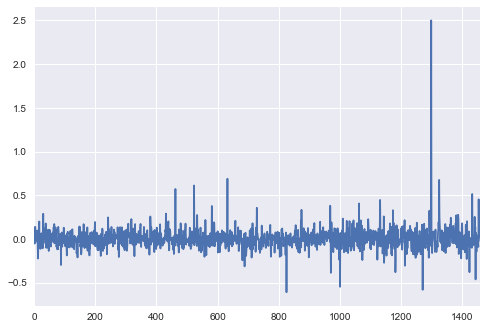

In [614]:
predicted = pd.Series(lm1.predict(xtrain).reshape(-1), index=train.index)
residual = predicted - ytrain.reshape(-1)
residual = pd.Series([float(item) for item in residual], index=train.index)
residual.plot()

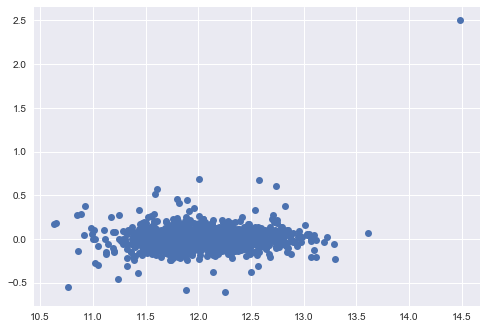

In [615]:
fig, ax = plt.subplots()
ax.plot(predicted, residual, 'o');

In [616]:
np.where(lm1.predict(xtrain) > 14)

(array([1298], dtype=int64), array([0], dtype=int64))

In [617]:
train.iloc[1298]

Id                  1299
MSSubClass            60
MSZoning              RL
LotFrontage          313
LotArea            63887
Street              Pave
Alley                NaN
LotShape             IR3
LandContour          Bnk
Utilities         AllPub
LotConfig         Corner
LandSlope            Gtl
Neighborhood     Edwards
Condition1         Feedr
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual           10
OverallCond            5
YearBuilt           2008
YearRemodAdd        2008
RoofStyle            Hip
RoofMatl         ClyTile
Exterior1st       Stucco
Exterior2nd       Stucco
MasVnrType         Stone
MasVnrArea           796
ExterQual             Ex
ExterCond             TA
Foundation         PConc
                  ...   
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           Ex
TotRmsAbvGrd          12
Functional           Typ
Fireplaces             3
FireplaceQu           Gd
GarageType        Attchd
GarageYrBlt         2008


In [619]:
xtrain = pd.get_dummies(df[ df['Id'].isin(train_ids.drop(1298)) ])
ytrain = np.log(xtrain.pop('SalePrice').values).reshape(-1,1)
xtrain = xtrain.values

xtest = df[ df['Id'].isin(test_ids) ]
xtest = pd.get_dummies(xtest.drop('SalePrice', axis=1)).values

lm1 = LinearRegression()
rmse_cv(lm1, xtrain, ytrain)

0.13998201410492742

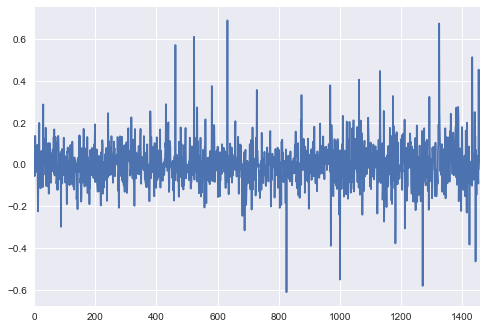

In [620]:
predicted = pd.Series(lm1.predict(xtrain).reshape(-1), index=train.drop(1298).index)
residual = predicted - ytrain.reshape(-1)
residual = pd.Series([float(item) for item in residual], index=train.drop(1298).index)
residual.plot()

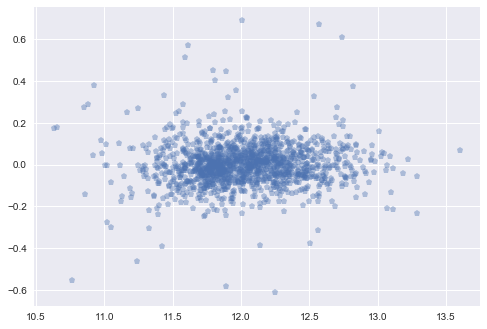

In [635]:
fig, ax = plt.subplots()
ax.plot(predicted, residual, 'p', alpha=0.4);

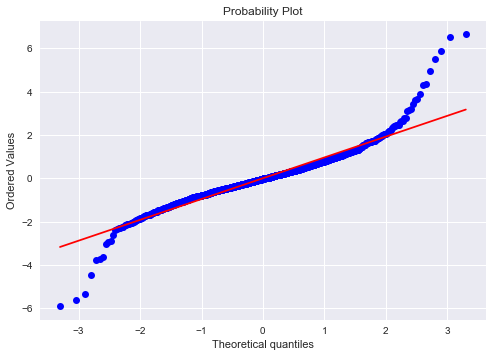

In [623]:
import scipy.stats as stats
from sklearn.preprocessing import scale

stats.probplot(scale(residual), dist='norm', plot=plt);

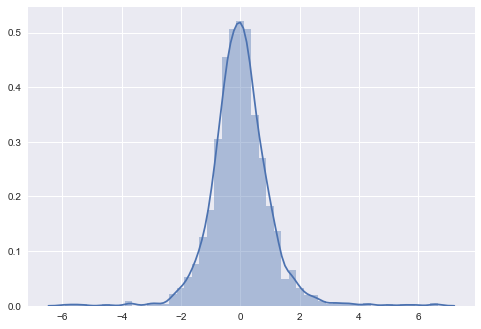

In [636]:
sns.distplot(scale(residual));

In [625]:
from scipy.stats.mstats import normaltest
normaltest(residual)

NormaltestResult(statistic=275.4844988914881, pvalue=1.5111276102571219e-60)

## Decision Tree

In [640]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(random_state=420)
rmse_cv(tree1, xtrain, ytrain)

0.22095032902092038

In [641]:
from sklearn.model_selection import GridSearchCV
tree2 = DecisionTreeRegressor(random_state=420)
parameters = {
    'splitter': ['best', 'random'],
    'max_depth': [10, 100, 1000],
    'min_samples_split': [10, 100, 1000],
    'min_samples_leaf': [10, 100, 1000]
}

tree2 = GridSearchCV(DecisionTreeRegressor(random_state=420), parameters)
rmse_cv(tree2, xtrain, ytrain)

0.18104067909544308

## Random Forest

In [645]:
from sklearn.ensemble import RandomForestRegressor

forest1 = RandomForestRegressor(random_state=420)
parameters = {
    'n_estimators': [10, 100],
    'max_depth': [10, 100],
    'min_samples_split': [10, 100],
    'min_samples_leaf': [10, 100],
}
forest1 = GridSearchCV(forest1, parameters)
rmse_cv(forest1, xtrain, ytrain.reshape(-1))

0.15015305929134704

## Ridge Regression

In [650]:
from sklearn.linear_model import Ridge

parameters = {
    'alpha': np.arange(0.1, 1, 0.25),
    'solver': ['svd', 'cholesky', 'sparse_cg', 'lsqr', 'sag'],
}

ridge1 = GridSearchCV(Ridge(random_state=420),parameters)
ridge1.fit(scale(xtrain), scale(ytrain))

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=420, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.1 ,  0.35,  0.6 ,  0.85]), 'solver': ['svd', 'cholesky', 'sparse_cg', 'lsqr', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [653]:
kfold = KFold(n_splits=3)
results = list()
    
for train_idx, test_idx in kfold.split(xtrain):
    ridge1.fit(scale(xtrain[train_idx]), scale(ytrain[train_idx]))
    predicted_standardized = ridge1.predict(scale(xtrain[test_idx]))
    predicted = predicted_standardized * ytrain[train_idx].std() + ytrain[train_idx].mean()
    actual = ytrain[test_idx]
    mse = mean_squared_error(predicted, actual)
    rmse = np.sqrt(mse)
    results.append(rmse)
        
np.array(results).mean()

0.13763394702519161

## Lasso Regression

In [657]:
from sklearn.linear_model import Lasso

parameters = {
    'alpha': np.arange(0.1, 1, 0.1),
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
}

lasso1 = GridSearchCV(Lasso(random_state=420),parameters)

kfold = KFold(n_splits=3)
results = list()
    
for train_idx, test_idx in kfold.split(xtrain):
    lasso1.fit(scale(xtrain[train_idx]), scale(ytrain[train_idx]))
    predicted_standardized = lasso1.predict(scale(xtrain[test_idx]))
    predicted = predicted_standardized * ytrain[train_idx].std() + ytrain[train_idx].mean()
    actual = ytrain[test_idx]
    mse = mean_squared_error(predicted, actual)
    rmse = np.sqrt(mse)
    results.append(rmse)
        
np.array(results).mean()

0.15976731417163936

## Elastic Net

In [659]:
from sklearn.linear_model import ElasticNet

parameters = {
    'alpha': np.arange(0.1, 1, 0.1),
    'l1_ratio': np.arange(0.1, 1, 0.1),
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
}

elastic1 = GridSearchCV(ElasticNet(random_state=420),parameters)

kfold = KFold(n_splits=3)
results = list()
    
for train_idx, test_idx in kfold.split(xtrain):
    elastic1.fit(scale(xtrain[train_idx]), scale(ytrain[train_idx]))
    predicted_standardized = elastic1.predict(scale(xtrain[test_idx]))
    predicted = predicted_standardized * ytrain[train_idx].std() + ytrain[train_idx].mean()
    actual = ytrain[test_idx]
    mse = mean_squared_error(predicted, actual)
    rmse = np.sqrt(mse)
    results.append(rmse)
        
np.array(results).mean()

0.1218396818816907

# Making Predictions

It appears that the Elastic Net model is best so far. Let's go ahead and make predictions for submission.

In [664]:
elastic1.fit(scale(xtrain), scale(ytrain))
elastic_predictions = elastic1.predict(scale(xtest))

In [668]:
elastic_predictions = elastic_predictions * ytrain.std() + ytrain.mean()
elastic_predictions = np.e**elastic_predictions
elastic_predictions

array([ 125574.53519391,  157855.2064839 ,  183241.52254068, ...,
        167139.13289289,  122544.48379694,  230470.2952467 ])

In [670]:
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': elastic_predictions})
submission

,Id,SalePrice
0,1461,125574.535194
1,1462,157855.206484
2,1463,183241.522541
3,1464,201636.086498
4,1465,197378.263385
5,1466,175941.747245
6,1467,185365.003415
7,1468,168094.906486
8,1469,195991.892446
9,1470,123247.070014


In [677]:
submission['SalePrice'].describe().astype(int)

count       1459
mean      180177
std        81686
min        47726
25%       128774
50%       158940
75%       210966
max      1454610
Name: SalePrice, dtype: int32

In [679]:
submission.to_csv('submission.csv', index=False)